In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt


In [ ]:
data_org = pd.read_csv("/content/train.csv")
test_act_df = pd.read_csv("/content/train.csv")

In [ ]:
df = data_org[data_org['fare'] != 0]
no_need = ['tip', 'miscellaneous_fees', 'total_fare']
data_org = df.drop(columns=no_need)

In [ ]:
data_mat = data_org.values


In [ ]:
train_data, test_data, train_labels, test_labels = train_test_split(
    data_mat[:, :-1], data_mat[:, -1], test_size=0.2, random_state=42
)

In [ ]:
dtrain = xgb.DMatrix(data=train_data, label=train_labels)
dtest = xgb.DMatrix(data=test_data, label=test_labels)

In [ ]:
model = xgb.train(
    params={'objective': 'reg:squarederror'},
    dtrain=dtrain,
    num_boost_round=1000,
    early_stopping_rounds=10,
    evals=[(dtest, 'eval')],
    verbose_eval=True
)


[0]	eval-rmse:0.43250
[1]	eval-rmse:0.42370
[2]	eval-rmse:0.41886
[3]	eval-rmse:0.41640
[4]	eval-rmse:0.41492
[5]	eval-rmse:0.41386
[6]	eval-rmse:0.41322
[7]	eval-rmse:0.41282
[8]	eval-rmse:0.41261
[9]	eval-rmse:0.41230
[10]	eval-rmse:0.41207
[11]	eval-rmse:0.41191
[12]	eval-rmse:0.41159
[13]	eval-rmse:0.41143
[14]	eval-rmse:0.41129
[15]	eval-rmse:0.41128
[16]	eval-rmse:0.41123
[17]	eval-rmse:0.41120
[18]	eval-rmse:0.41118
[19]	eval-rmse:0.41117
[20]	eval-rmse:0.41116
[21]	eval-rmse:0.41117
[22]	eval-rmse:0.41113
[23]	eval-rmse:0.41112
[24]	eval-rmse:0.41111
[25]	eval-rmse:0.41101
[26]	eval-rmse:0.41097
[27]	eval-rmse:0.41086
[28]	eval-rmse:0.41080
[29]	eval-rmse:0.41078
[30]	eval-rmse:0.41075
[31]	eval-rmse:0.41076
[32]	eval-rmse:0.41076
[33]	eval-rmse:0.41068
[34]	eval-rmse:0.41067
[35]	eval-rmse:0.41065
[36]	eval-rmse:0.41064
[37]	eval-rmse:0.41060
[38]	eval-rmse:0.41057
[39]	eval-rmse:0.41052
[40]	eval-rmse:0.41051
[41]	eval-rmse:0.41048
[42]	eval-rmse:0.41046
[43]	eval-rmse:0.4104

In [ ]:
pred = model.predict(dtest)

In [ ]:
xgboost_rmse = np.sqrt(mean_squared_error(test_labels, pred))
print("XGBoost RMSE:", xgboost_rmse)

XGBoost RMSE: 0.4103047057015153


In [ ]:
watchlist = [(dtrain, 'train'), (dtest, 'eval')]
model_tuned = xgb.train(
    params={'objective': 'reg:squarederror', 'max_depth': 3, 'eta': 0.01, 'nthread': 3},
    dtrain=dtrain,
    num_boost_round=5000,
    evals=watchlist,
    early_stopping_rounds=50,
    verbose_eval=True
)

[0]	train-rmse:0.44873	eval-rmse:0.44893
[1]	train-rmse:0.44816	eval-rmse:0.44837
[2]	train-rmse:0.44760	eval-rmse:0.44782
[3]	train-rmse:0.44705	eval-rmse:0.44728
[4]	train-rmse:0.44650	eval-rmse:0.44674
[5]	train-rmse:0.44596	eval-rmse:0.44622
[6]	train-rmse:0.44543	eval-rmse:0.44570
[7]	train-rmse:0.44492	eval-rmse:0.44520
[8]	train-rmse:0.44441	eval-rmse:0.44470
[9]	train-rmse:0.44391	eval-rmse:0.44422
[10]	train-rmse:0.44342	eval-rmse:0.44373
[11]	train-rmse:0.44294	eval-rmse:0.44326
[12]	train-rmse:0.44247	eval-rmse:0.44280
[13]	train-rmse:0.44201	eval-rmse:0.44235
[14]	train-rmse:0.44155	eval-rmse:0.44190
[15]	train-rmse:0.44110	eval-rmse:0.44147
[16]	train-rmse:0.44067	eval-rmse:0.44104
[17]	train-rmse:0.44024	eval-rmse:0.44062
[18]	train-rmse:0.43981	eval-rmse:0.44020
[19]	train-rmse:0.43939	eval-rmse:0.43979
[20]	train-rmse:0.43898	eval-rmse:0.43939
[21]	train-rmse:0.43858	eval-rmse:0.43900
[22]	train-rmse:0.43818	eval-rmse:0.43861
[23]	train-rmse:0.43780	eval-rmse:0.43823
[2

In [ ]:
model_rf = RandomForestRegressor(
    n_estimators=500,
    max_features='sqrt',
    random_state=42
)
model_rf.fit(train_data, train_labels)

RandomForestRegressor(max_features='sqrt', n_estimators=500, random_state=42)

In [ ]:
pred_rf = model_rf.predict(test_data)

In [ ]:
results_df = pd.DataFrame({'Actual': test_labels, 'Predicted': pred})


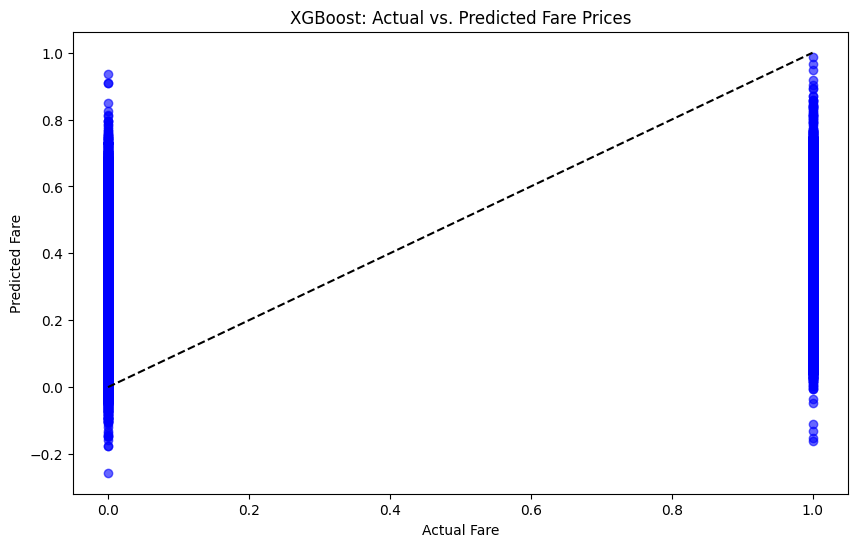

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(results_df['Actual'], results_df['Predicted'], color='blue', alpha=0.6)
plt.plot([min(test_labels), max(test_labels)], [min(test_labels), max(test_labels)], linestyle='--', color='black')
plt.xlabel('Actual Fare')
plt.ylabel('Predicted Fare')
plt.title('XGBoost: Actual vs. Predicted Fare Prices')
plt.show()


Text(0.5, 1.0, 'Random Forest: Actual')

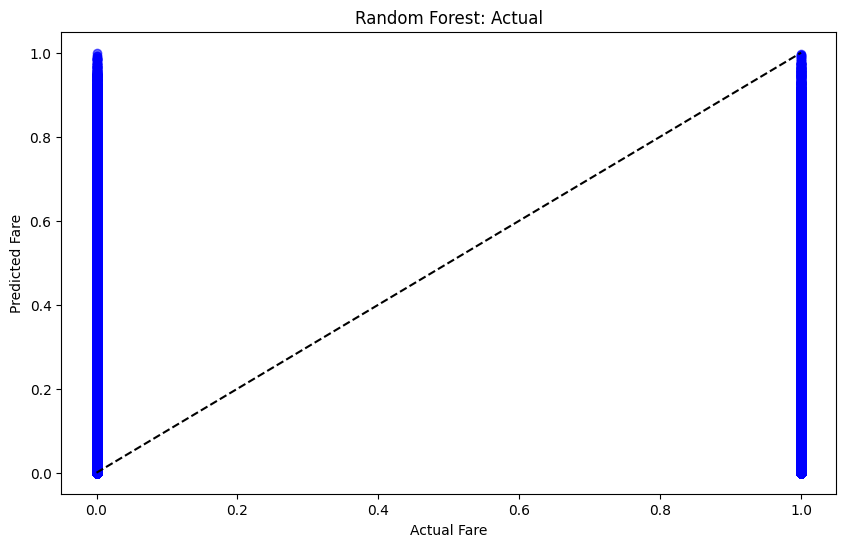

In [ ]:
results_df_rf = pd.DataFrame({'Actual': test_labels, 'Predicted': pred_rf})
plt.figure(figsize=(10, 6))
plt.scatter(results_df_rf['Actual'], results_df_rf['Predicted'], color='blue', alpha=0.6)
plt.plot([min(test_labels), max(test_labels)], [min(test_labels), max(test_labels)], linestyle='--', color='black')
plt.xlabel('Actual Fare')
plt.ylabel('Predicted Fare')
plt.title('Random Forest: Actual')